In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [12]:
# Dataset1: Client Profiles: Demographics like age, gender, and account details of our clients.

In [13]:
file_path='data/df_final_demo.txt'

df1 = pd.read_csv(file_path, delimiter=',')
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [14]:
# Dataset2: Digital Footprints pt1 & pt2: A detailed trace of client interactions online, divided into two parts: pt_1 and pt_2. It’s recommended to merge these two files prior to a comprehensive data analysis.

In [15]:
file_path='data/df_final_web_data_pt_1.txt'
df2 = pd.read_csv(file_path, delimiter=',')

In [16]:
file_path='data/df_final_web_data_pt_2.txt'
df3 = pd.read_csv(file_path, delimiter=',')

In [17]:
df2 = pd.concat([df2, df3])
df2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [18]:
#Dataset 3: Experiment Roster: A list revealing which clients were part of the grand experiment.

In [19]:
file_path='/Users/ironhack/Downloads/df_final_experiment_clients.txt'
df3 = pd.read_csv(file_path, delimiter=',')
df3.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ironhack/Downloads/df_final_experiment_clients.txt'

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?
Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

In [129]:
# Merged Dataframes

In [130]:
merged_df = pd.merge(df1, df2, on='client_id', how='outer') 
merged_df = pd.merge(merged_df, df3, on='client_id', how='outer') 

merged_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,Variation
0,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,NaN
1,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,NaN
2,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,NaN
3,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,NaN
4,169,21.0,262.0,47.5,M,2.0,501570.72,4.0,4.0,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,NaN


In [131]:
df= merged_df

In [132]:
df['clnt_age'].value_counts()

clnt_age
58.5    6432
57.5    6115
52.5    6061
59.5    6037
55.5    5913
        ... 
96.0      10
14.0      10
13.5       9
95.5       6
94.5       5
Name: count, Length: 165, dtype: int64

In [133]:
#Who are the primary clients using this online process? late 50s

<Axes: xlabel='clnt_age', ylabel='Count'>

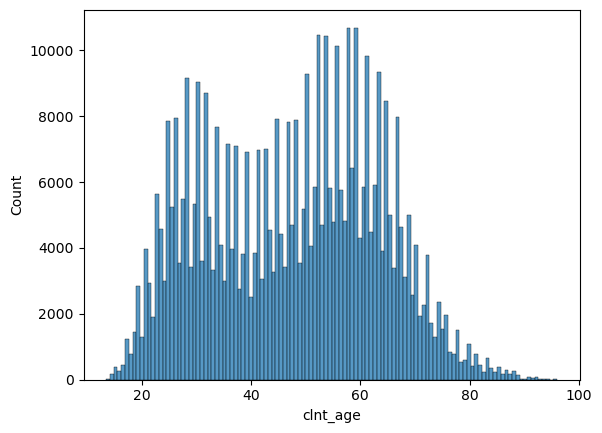

In [134]:
sns.histplot(data=df, x='clnt_age')

In [135]:
# Are the primary clients younger or older, new or long-standing? 
#clnt_tenure_yr: Represents how long the client has been with Vanguard, measured in years.
# clnt_tenure_mnth: Further breaks down the client’s tenure with Vanguard in months.
#num_accts: Denotes the number of accounts the client holds with Vanguard.

In [136]:
# CLEANING 

In [137]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'visitor_id',
       'visit_id', 'process_step', 'date_time', 'Variation'],
      dtype='object')

In [138]:
null_counts = df.isnull().sum()
print(null_counts)

client_id                0
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
visitor_id               0
visit_id                 0
process_step             0
date_time                0
Variation           434096
dtype: int64


In [183]:
# replace nullvalues

df['clnt_age'] = df['clnt_age'].fillna(df['clnt_age'].median(),inplace=True)
print(df['gendr'].isnull().sum())

755405


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/jr/tzjk1k550jnfd3ck0z2tl_nr0000gn/T/ipykernel_2779/3563211911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clnt_age'] = df['clnt_age'].fillna(df['clnt_age'].median(),inplace=True)
/var/folders/jr/tzjk1k550jnfd3ck0z2tl_nr0000gn/T/ipykernel_2779/3563211911.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is d

In [ ]:
#df['clnt_tenure_yr'] = df['clnt_tenure_yr'].fillna(df['clnt_tenure_yr'].median(),inplace=True)
#df['bal'] = df['bal'].fillna(df['bal'].median(),inplace=True

In [181]:
null_counts = df.isnull().sum()
print(null_counts)

client_id                0
clnt_tenure_yr      755405
clnt_tenure_mnth    305689
clnt_age            755405
gendr               755405
num_accts           305689
bal                 755405
calls_6_mnth        305689
logons_6_mnth       305689
visitor_id               0
visit_id                 0
process_step             0
date_time                0
Variation           434096
dtype: int64
